In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
df_tc = data['Total Consumers']
df_w = data['Weather']
df_tc

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [3]:
our_data = pd.read_csv("output.csv")
our_data

,Time,PT41CV,PT44AL,PT15VP,PT69QG,PT43QL,PT17RW,PT87ZW
0,2021-11-01 00:15:00,0.028,0.452,0.000,0.828,0.128,0.056,0.552
1,2021-11-01 00:30:00,0.080,0.440,0.000,0.796,0.160,0.056,0.492
2,2021-11-01 00:45:00,0.092,0.424,0.000,0.832,0.220,0.056,0.308
3,2021-11-01 01:00:00,0.040,0.408,0.000,0.800,0.404,0.088,0.156
4,2021-11-01 01:15:00,0.076,0.396,0.000,0.836,0.156,0.116,0.160
...,...,...,...,...,...,...,...,...
35027,2022-10-31 23:00:00,0.120,0.448,0.108,0.220,0.164,0.144,0.368
35028,2022-10-31 23:15:00,0.036,0.424,0.124,0.252,0.228,0.164,0.396
35029,2022-10-31 23:30:00,0.064,0.392,0.148,0.268,0.224,0.220,0.356
35030,2022-10-31 23:45:00,0.132,0.260,0.132,0.276,0.212,0.176,0.392


In [4]:
our_total = pd.DataFrame(our_data.sum(axis=1))
our_total.columns = ['Energy']
our_total

,Energy
0,2.044
1,2.024
2,1.932
3,1.896
4,1.740
...,...
35027,1.572
35028,1.624
35029,1.672
35030,1.580


In [5]:
df_w

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [6]:
df_merge = pd.concat([df_w,df_tc[0].rename("Energy")], axis=1)
df_merged = df_merge.dropna(axis=0).reset_index(drop=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime']) 
df_merged

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,2019-01-01 00:15:00,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0,2.964
1,2019-01-01 00:30:00,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0,2.584
2,2019-01-01 00:45:00,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0,3.071
3,2019-01-01 01:00:00,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0,2.694
4,2019-01-01 01:15:00,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0,2.569
...,...,...,...,...,...,...,...,...,...,...,...
12081,2019-05-17 23:00:00,12.0,8.0,1017.0,11.0,19.0,76.0,0.0,0.0,0.0,2.821
12082,2019-05-17 23:15:00,12.0,8.0,1016.0,11.0,17.0,76.0,0.0,0.0,0.0,3.031
12083,2019-05-17 23:30:00,12.0,8.0,1016.0,4.0,12.0,76.0,0.0,0.0,0.0,2.279
12084,2019-05-17 23:45:00,12.0,8.0,1016.0,3.0,14.0,76.0,0.0,0.0,0.0,2.580


In [7]:
df_total = pd.DataFrame(df_tc.sum(axis=1))
df_total.columns = ['Energy']
df_total = df_total[:df_merged.shape[0]]
df_total

,Energy
0,58.514142
1,57.575249
2,63.011688
3,62.735722
4,63.404029
...,...
12081,27.351455
12082,23.865841
12083,23.365855
12084,33.772043


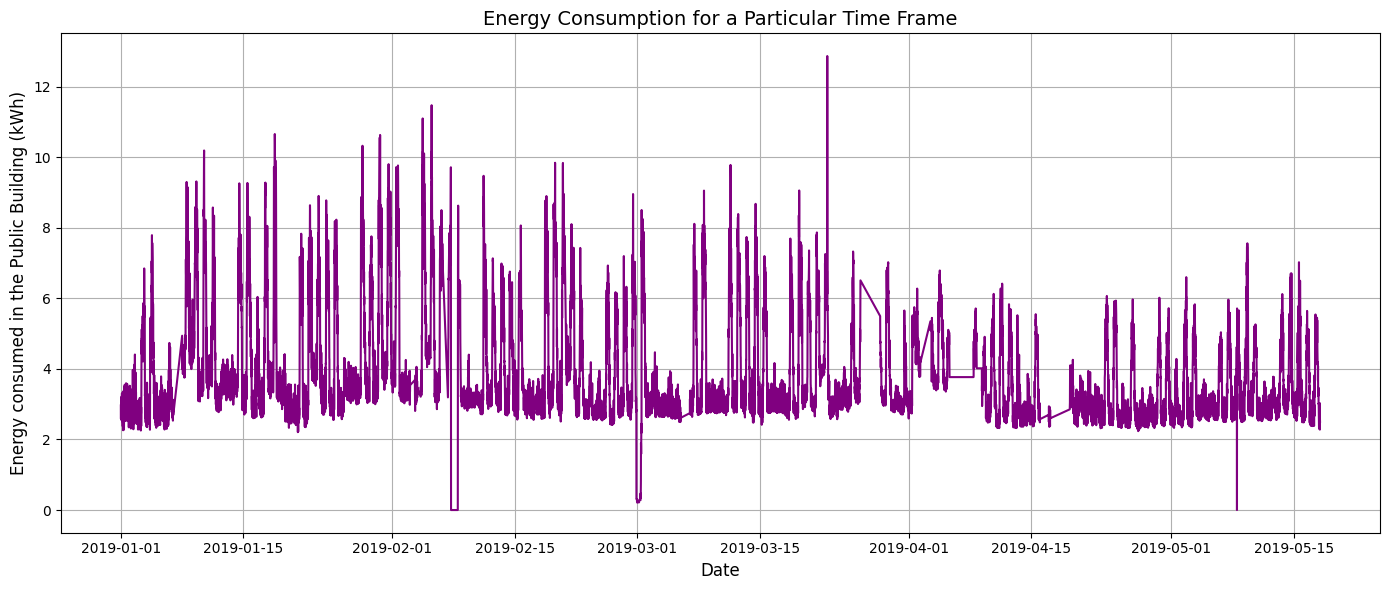

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_merged["Energy"], color='purple')
plt.ylabel('Energy consumed in the Public Building (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

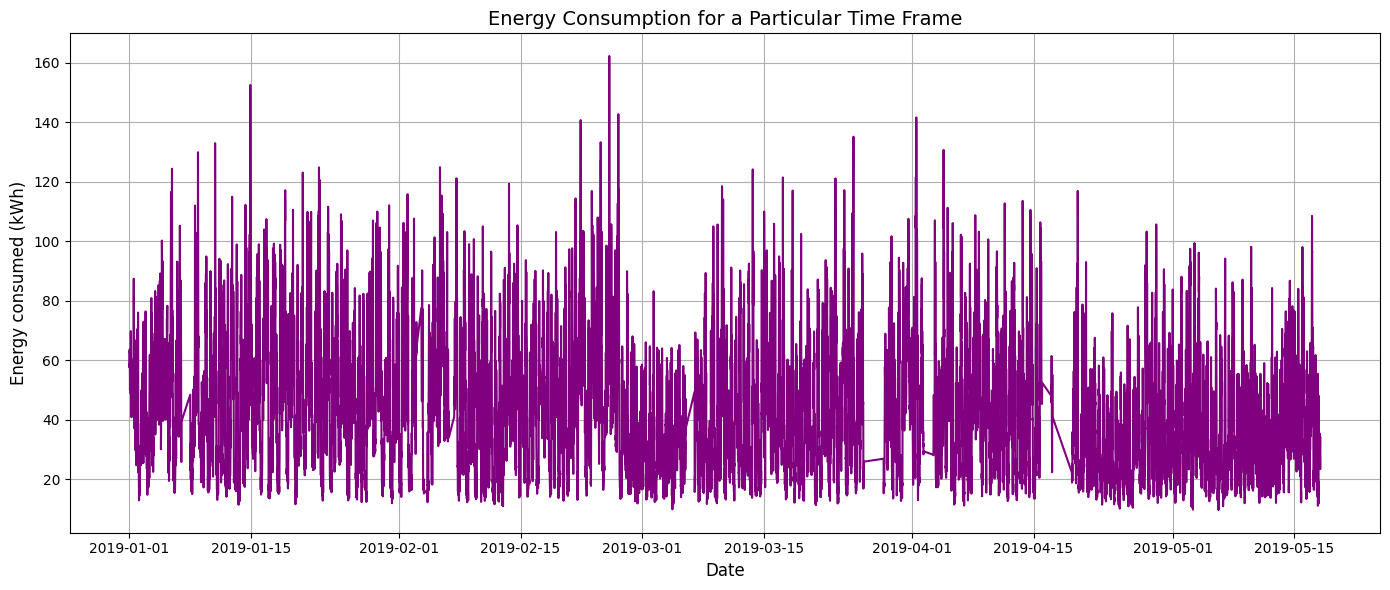

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_total, color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

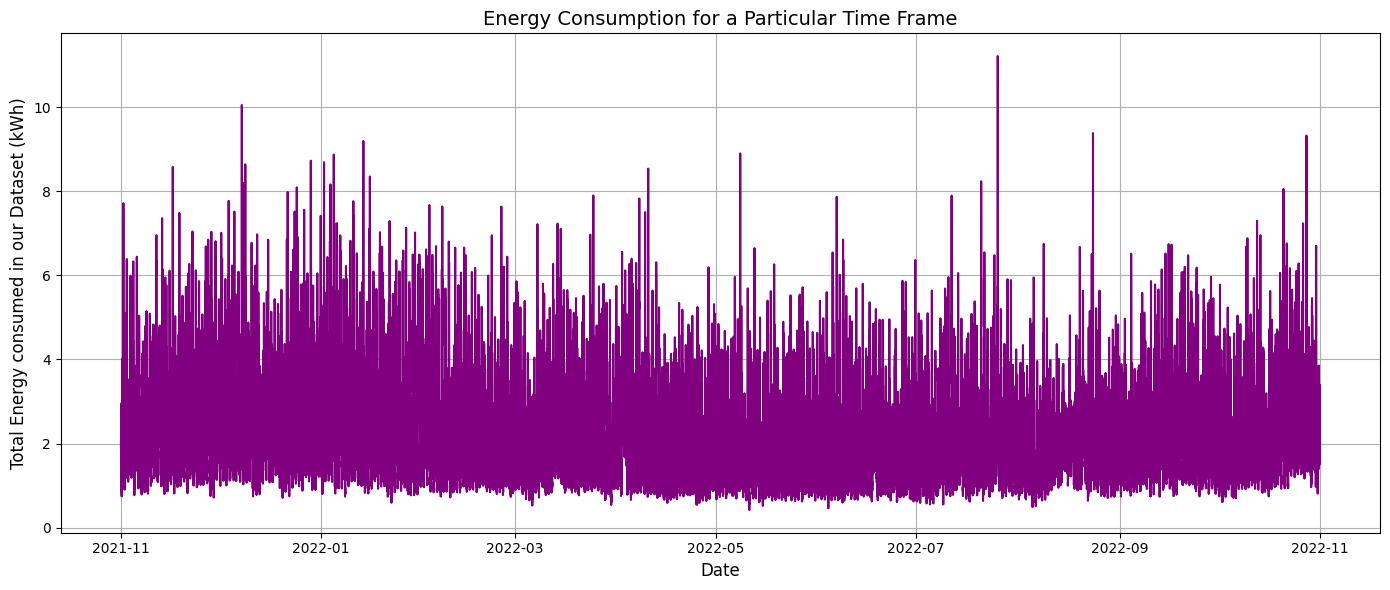

In [10]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_total, color='purple')
plt.ylabel('Total Energy consumed in our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

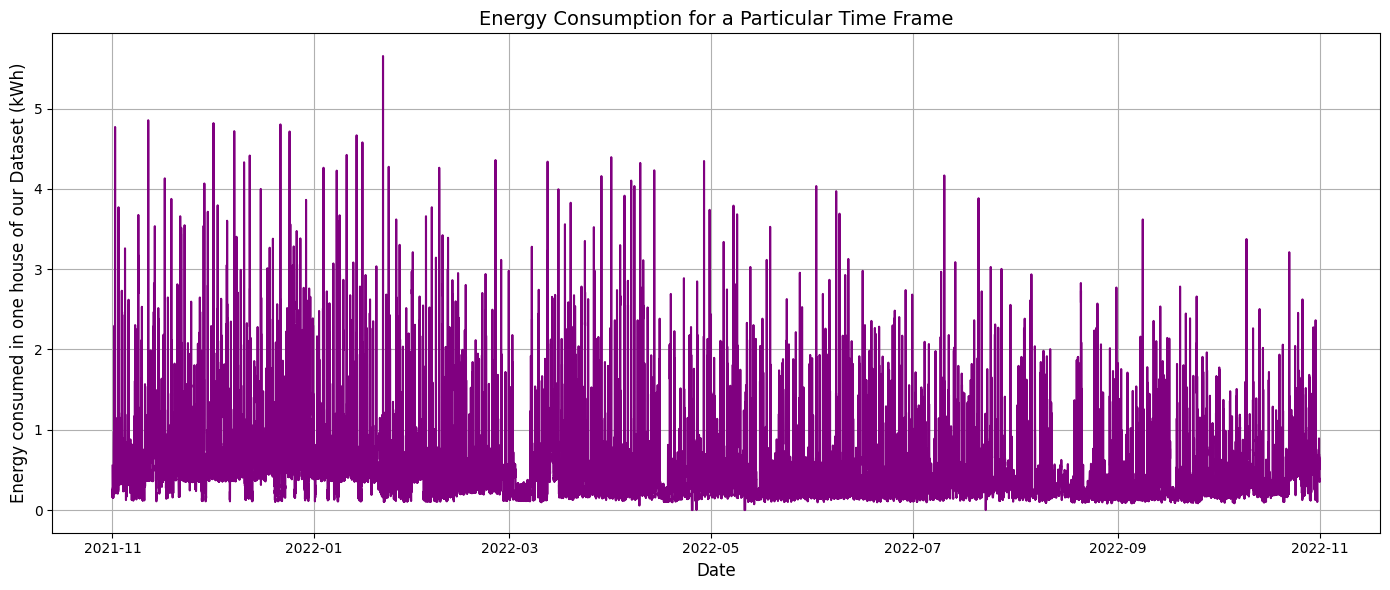

In [11]:
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(our_data['Time']), our_data['PT87ZW'], color='purple')
plt.ylabel('Energy consumed in one house of our Dataset (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

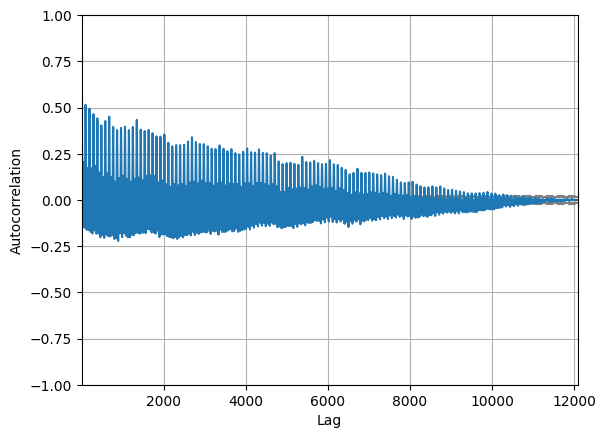

In [12]:
autocorrelation_plot(df_total)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

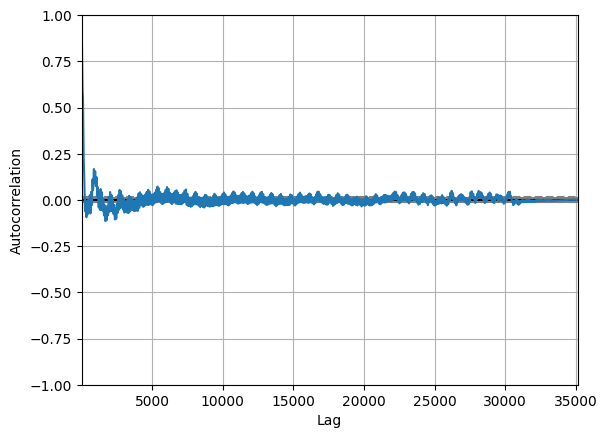

In [13]:
autocorrelation_plot(df_tc[0])

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

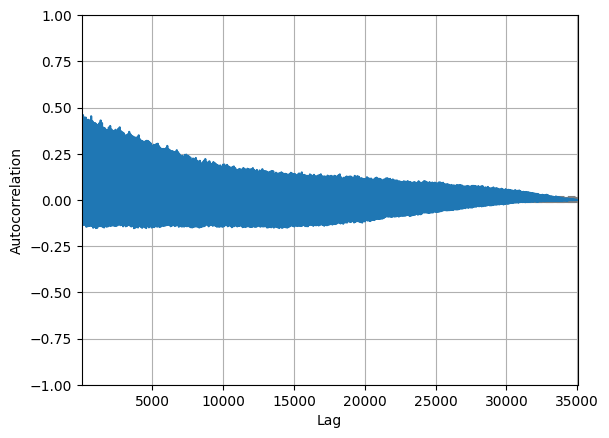

In [14]:
autocorrelation_plot(our_total)

## Visualize by day of week

In [15]:
df = pd.read_pickle("df_location.pkl")
df.reset_index(drop=True, inplace=True)
df = df.iloc[:, [0, 2, 1]]
df

,Time,Location,Energy
0,2019-01-01 00:00:00,0,2.964000
1,2019-01-01 00:15:00,0,2.584000
2,2019-01-01 00:30:00,0,3.071000
3,2019-01-01 00:45:00,0,2.694000
4,2019-01-01 01:00:00,0,2.569000
...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222
1791932,2020-01-01 23:00:00,50,0.716855
1791933,2020-01-01 23:15:00,50,0.735802
1791934,2020-01-01 23:30:00,50,0.485237


In [16]:
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['DayOfYear'] = df['Time'].dt.dayofyear
df['Weekend'] = df['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df['Hour'] = df['Time'].dt.hour
df

,Time,Location,Energy,DayOfWeek,DayOfYear,Weekend,Hour
0,2019-01-01 00:00:00,0,2.964000,1,1,0,0
1,2019-01-01 00:15:00,0,2.584000,1,1,0,0
2,2019-01-01 00:30:00,0,3.071000,1,1,0,0
3,2019-01-01 00:45:00,0,2.694000,1,1,0,0
4,2019-01-01 01:00:00,0,2.569000,1,1,0,1
...,...,...,...,...,...,...,...
1791931,2020-01-01 22:45:00,50,0.753222,2,1,0,22
1791932,2020-01-01 23:00:00,50,0.716855,2,1,0,23
1791933,2020-01-01 23:15:00,50,0.735802,2,1,0,23
1791934,2020-01-01 23:30:00,50,0.485237,2,1,0,23


In [19]:
df_weekly = df.groupby(['DayOfWeek']).mean()
df_weekly.drop(['Location', 'DayOfYear', 'Hour', 'Weekend'], inplace=True, axis=1)
df_weekly

,Energy
DayOfWeek,
0,0.764698
1,0.736422
2,0.775358
3,0.760662
4,0.788554
5,0.738582
6,0.779934


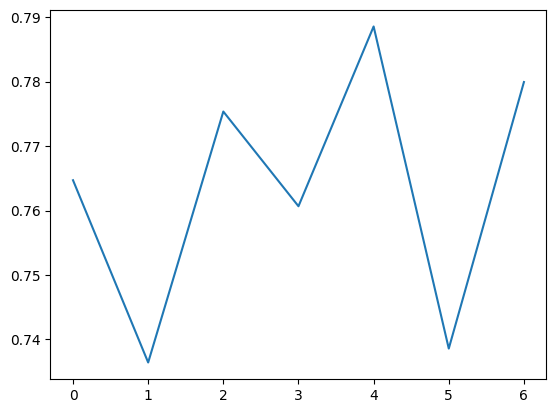

In [30]:
plt.plot(range(len(df_weekly)), df_weekly['Energy'])
plt.show()